# Diagonsis and DIA (Data Inspection Assistant)

If you cannot import this module, please try: pip install "polars_ds[plot]"

In [1]:
import polars as pl
import polars_ds as pds

In [2]:
df = pds.random_data(size=100_000, n_cols = 1).select(
    pds.random(0.0, 12.0).alias("uniform_1"),
    pds.random(0.0, 1.0).alias("uniform_2"),
    pds.random_exp(0.5).alias("exp"),
    pds.random_normal(0.0, 1.0).alias("normal"),
    pds.random_normal(0.0, 1000.0).alias("fat_normal"),
)
df.head()

uniform_1,uniform_2,exp,normal,fat_normal
f64,f64,f64,f64,f64
7.748628,0.353691,4.269598,1.362771,1057.286833
10.188664,0.252275,1.065019,0.425007,298.643631
3.346487,0.562263,10.894036,1.276271,1975.57158
10.869668,0.297094,0.260944,-0.452475,890.284128
8.603317,0.26936,1.842966,-0.156502,-618.43103


In [3]:
from polars_ds.diagnosis import DIA
dia = DIA(df)

In [4]:
dia.numeric_profile(n_bins=20)

GT(_tbl_data=shape: (5, 8)
┌────────────┬───────┬──────┬────────┬─────────┬────────────────────────┬──────────┬────────┐
│ column     ┆ null% ┆ mean ┆ median ┆ std     ┆ histogram              ┆ min      ┆ max    │
│ ---        ┆ ---   ┆ ---  ┆ ---    ┆ ---     ┆ ---                    ┆ ---      ┆ ---    │
│ str        ┆ f64   ┆ f64  ┆ f64    ┆ f64     ┆ struct[1]              ┆ f64      ┆ f64    │
╞════════════╪═══════╪══════╪════════╪═════════╪════════════════════════╪══════════╪════════╡
│ uniform_1  ┆ 0.0   ┆ 6.0  ┆ 6.0    ┆ 3.46    ┆ {[5025, 5124, … 4932]} ┆ 0.0      ┆ 12.0   │
│ uniform_2  ┆ 0.0   ┆ 0.5  ┆ 0.5    ┆ 0.29    ┆ {[5007, 5003, … 5028]} ┆ 0.0      ┆ 1.0    │
│ exp        ┆ 0.0   ┆ 2.01 ┆ 1.39   ┆ 2.0     ┆ {[42493, 24665, … 4]}  ┆ 0.0      ┆ 22.25  │
│ normal     ┆ 0.0   ┆ 0.0  ┆ 0.0    ┆ 1.0     ┆ {[4, 10, … 5]}         ┆ -4.55    ┆ 4.33   │
│ fat_normal ┆ 0.0   ┆ 0.44 ┆ 0.2    ┆ 1000.23 ┆ {[2, 8, … 8]}          ┆ -4550.04 ┆ 4160.9 │
└────────────┴───────┴──────┴────────┴─────────┴────────────────────────┴──────────┴────────┘, _body=<great_tables._gt_data.Body object at 0x740a02144a90>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='median', type=<ColInfoTypeEnum.default: 1>, column_label='median', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='histogram', type=<ColInfoTypeEnum.default: 1>, column_label='histogram', column_align='center', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='max', type=<ColInfoTypeEnum.default: 1>, column_label='max', column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname='uniform_1', group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname='uniform_2', group_label=None, built=False), RowInfo(rownum_i=2, group_id=None, rowname='exp', group_label=None, built=False), RowInfo(rownum_i=3, group_id=None, rowname='normal', group_label=None, built=False), RowInfo(rownum_i=4, group_id=None, rowname='fat_normal', group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7409df53f490>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7409ebb61810>, <great_tables._gt_data.FormatInfo object at 0x7409e807a710>], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True,

In [5]:
dia.infer_corr()

x,y,corr
str,str,f64
"""exp""","""normal""",0.005738
"""uniform_1""","""normal""",0.005498
"""exp""","""fat_normal""",-0.004348
"""normal""","""fat_normal""",-0.003997
"""uniform_2""","""fat_normal""",0.001722
"""uniform_1""","""uniform_2""",0.001554
"""uniform_2""","""normal""",0.001121
"""uniform_1""","""exp""",0.001004
"""uniform_2""","""exp""",-0.000686


# Dependency Detection

Does knowing values in column A tell us values in column B?

In [6]:
df = pl.read_parquet("dependency.parquet")
df.head()

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPC9049317122…","""Female""","""23/07/79""","""15/07/16""","""C10001""","""A""","""COM0044082""","""A""",4,2000.0,"""B001""","""P""","""N""","""S122""","""G""",0.0,null,null,null,null,0,0
"""APPD4061126334…","""Male""","""07/12/86""","""04/07/16""","""C10003""","""A""","""COM0000002""","""C""",1,3500.0,"""B002""","""P""","""Y""","""S122""","""G""",0.0,20000,2,13.25,953,10,0
"""APPE7028924942…","""Male""","""10/12/82""","""19/07/16""","""C10125""","""C""","""COM0005267""","""C""",4,2250.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,45000,4,null,null,0,0
"""APPF8027386553…","""Male""","""30/01/89""","""09/07/16""","""C10477""","""C""","""COM0004143""","""A""",4,3500.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,92000,5,null,null,7,0
"""APPG6099443664…","""Male""","""19/04/85""","""20/07/16""","""C10002""","""A""","""COM0001781""","""A""",4,10000.0,"""B001""","""P""","""Y""","""S134""","""B""",2500.0,50000,2,null,null,10,0


In [7]:
dia = DIA(df)

In [8]:
dia.infer_dependency()

INFO:polars_ds.diagnosis:Running dependency for columns: ['Approved', 'Gender', 'Contacted', 'Primary_Bank_Type', 'City_Category', 'Employer_Category1', 'Employer_Category2', 'Var1', 'Loan_Period', 'Source_Category', 'Source', 'Customer_Existing_Primary_Bank_Code', 'Lead_Creation_Date', 'Loan_Amount', 'City_Code', 'EMI', 'DOB', 'Employer_Code', 'ID'].


column,by,cond_entropy
str,str,f64
"""Approved""","""ID""",0.0
"""Gender""","""ID""",0.0
"""Contacted""","""ID""",0.0
"""Primary_Bank_T…","""Customer_Exist…",0.0
"""Primary_Bank_T…","""ID""",0.0
…,…,…
"""Loan_Amount""","""City_Code""",2.702889
"""City_Code""","""EMI""",3.147327
"""Lead_Creation_…","""EMI""",3.92818


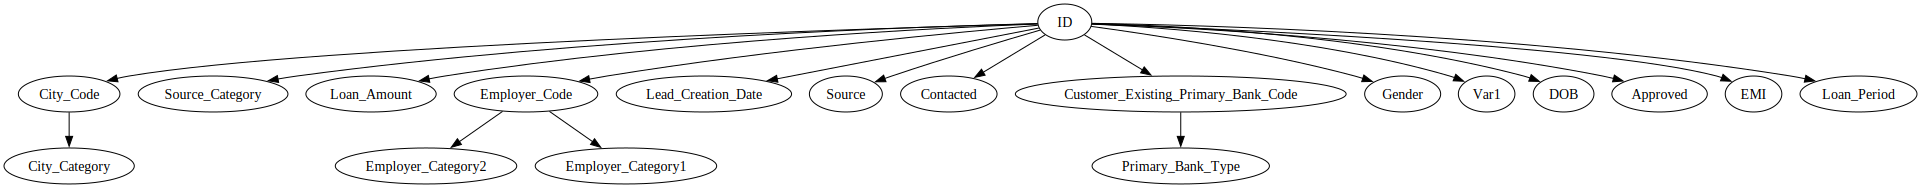

In [9]:
dia.plot_dependency()

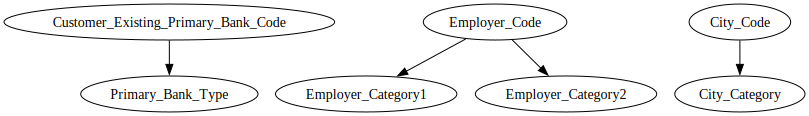

In [10]:
# ID implies everything, of course, because ID is unique.
# So let's not plot it
dia.plot_dependency(exclude=["ID"])

In [11]:
dia.str_stats()

column,null_count,n_unique,most_freq,most_freq_cnt,min_byte_len,min_char_len,avg_byte_len,avg_char_len,max_byte_len,max_char_len,5p_byte_len,95p_byte_len
str,u32,u32,str,u32,u32,u32,f64,f64,u32,u32,f64,f64
"""ID""",0,69713,"""APPC9049317122…",1,15,15,15.0,15.0,15,15,15.0,15.0
"""Gender""",0,2,"""Male""",39949,4,4,4.853901,4.853901,6,6,4.0,6.0
"""DOB""",15,10760,"""11/01/82""",253,8,8,8.0,8.0,8,8,8.0,8.0
"""Lead_Creation_…",0,92,"""02/09/16""",1838,8,8,8.0,8.0,8,8,8.0,8.0
"""City_Code""",814,679,"""C10001""",10007,6,6,6.0,6.0,6,6,6.0,6.0
…,…,…,…,…,…,…,…,…,…,…,…,…
"""Customer_Exist…",9391,58,"""B001""",14197,4,4,4.0,4.0,4,4,4.0,4.0
"""Primary_Bank_T…",9391,3,"""P""",39619,1,1,1.0,1.0,1,1,1.0,1.0
"""Contacted""",0,2,"""Y""",45275,1,1,1.0,1.0,1,1,1.0,1.0
